In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
%matplotlib inline

In [2]:
train = pd.read_csv("Train.csv")

In [3]:
test = pd.read_csv("Test.csv")

In [4]:
train['source'] = 'train'
test['source'] = 'test'

In [5]:
# Combine both train and test data sets intro one
data = pd.concat([train, test], sort=True)
data.head(20)


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1,train


In [6]:
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5+ MB


**The Item_Weight, Outlet_Size maybe have missing value**

In [8]:
# Checkinh missing data
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

**We can consider that:**
 + The missing value of Item_Weight and Outlet_Size should be imputed
 + The missing value of Item_Outlet_Sales come from test file

In [9]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


Observations:
1. It is more helpful to convert Outlet_Establishment_Year into how old the store is
2. The min value of Item_Visibility is not right, because products are not appear

In [10]:
# Find the number of unique values in each of columns
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

**1.There are 1559 products and 10 stores.<br> 
2.Having 16 unique types of item.**


In [11]:
# Get name of columns
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x] == 'object']

In [12]:
# need to exclude ID variable and source tables
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'Outlet_Identifier', 'source']]

In [13]:
for i in categorical_columns:
    print('\nFrequency of Categories for variable %s'%i)
    print(data[i].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for variable Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int6

**Observation from the summary:**<br>
1. In term of Item_Fat_Content, we can see that Low Fat = LF = low fat; Regular = reg<br>
2. The frequency of Supermarket Type2 and Supermarket Type3 is the same, so we can combine them **-->need to check mean to make a last decision.**<br>

# At the end of the data exploration, some summaries are:<br>
**Missing Value:**<br>
+ Item_Outlet_Sales is not important because it come from test file<br>
+ Need to care Item_Weight & Outlet_Size because of their missing values **--> should be imputed**<br>
+ The min of Item_Visibility is 0 <br>
+ In Item_Fat_Content, Low Fat = LF = low fat; Regular = reg <br>

**Feature Engineering**<br>
+ It might be more helpful to convert Outlet_Establishment_Years into how old these stores are.<br>
+ Need to convert to dummy variables.<br>



# Imputing missing data

**Item_Weight**

In [14]:
#data.plot.bar(x='Outlet_Identifier', y='Item_Weight', rot = 90)
#data.boxplot(column='Item_Weight', by='Outlet_Identifier', rot=90)

In [15]:
# find average of each item
avg_weight = data.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
avg_weight.head(15)

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
DRB24,8.785
DRB25,12.300
DRB48,16.750
DRC01,5.920


In [16]:
# Get a boolean variable specifying missing Item_Weight values

In [17]:
miss_boolean = data['Item_Weight'].isnull()

In [18]:
print('Orignal #missing: %d'% sum(miss_boolean))

Orignal #missing: 2439


In [19]:
# impute value
data.loc[miss_boolean,'Item_Weight'] = data.loc[miss_boolean,'Item_Identifier'].apply(lambda x: avg_weight.loc[x])

In [20]:
print('Final #missing: %d'% sum(data['Item_Weight'].isnull()))

Final #missing: 0


In [21]:
#data.boxplot(column='Item_Weight', by='Outlet_Identifier', rot=90)

**Outlet_Size**

In [22]:
# Determing the mode for each

In [23]:
outlet_size_mode = data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type',aggfunc = (lambda x:mode(x).mode[0]) )
print('Mode for each Outlet_Type:\n')

Mode for each Outlet_Type:



/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [24]:
#data.boxplot(column='Item_Outlet_Sales', by='Outlet_Type', rot=90)

In [25]:
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [26]:
#Get a boolean variable specifying missing Item_Weight values

In [27]:
miss_boolean = data['Outlet_Size'].isnull()
miss_boolean.head()

0    False
1    False
2    False
3     True
4    False
Name: Outlet_Size, dtype: bool

In [28]:
#Impute data and check #missing values before and after imputation to confirm
print('\nOrignal #missing: %d'% sum(miss_boolean))


Orignal #missing: 4016


In [29]:
data.loc[miss_boolean,'Outlet_Size'] = data.loc[miss_boolean,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print(sum(data['Outlet_Size'].isnull()))

0


In [30]:
data.pivot_table(values = 'Outlet_Size', index = 'Outlet_Identifier', aggfunc=(lambda x: mode(x).mode[0]))


,Outlet_Size
Outlet_Identifier,
OUT010,Small
OUT013,High
OUT017,Small
OUT018,Medium
OUT019,Small
OUT027,Medium
OUT035,Small
OUT045,Small
OUT046,Small


In [31]:
data.pivot_table(values = 'Item_Outlet_Sales', index = 'Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


**This table shows the significant difference between these Outlet_Type, so leaving them as it is**

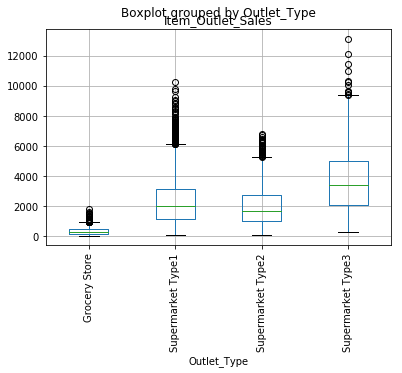

In [32]:
data.boxplot(column='Item_Outlet_Sales', by='Outlet_Type', rot=90)

**Solving the min value of Item_Visibility**

In [33]:
visibility_avg = data.pivot_table(values = 'Item_Visibility', index = 'Item_Identifier')
visibility_avg.head(20)

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
DRB24,0.020596
DRB25,0.079407
DRB48,0.023973
DRC01,0.020653


In [34]:
miss_boolean = (data['Item_Visibility'] == 0)

In [35]:
print('Number of 0 values initially: %d' %sum(miss_boolean))

Number of 0 values initially: 879


In [36]:
data.loc[miss_boolean,'Item_Visibility'] = data.loc[miss_boolean,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])

In [37]:
print('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values after modification: 0


In [38]:
# Determine another variable with means ratio

In [39]:
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg.loc[x['Item_Identifier']], axis=1)

In [40]:
print(data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


In [41]:
print(data['Item_Visibility_MeanRatio'])

0       0.931078
1       0.933420
2       0.960069
3       1.000000
4       1.000000
5       1.000000
6       1.497197
7       0.870493
8       0.924160
9       0.963983
10      1.000000
11      1.036695
12      1.026360
13      0.922290
14      1.171331
15      1.028073
16      1.003140
17      1.029671
18      0.870493
19      0.922116
20      1.139904
21      0.954309
22      0.862894
23      1.531537
24      0.929633
25      0.927507
26      1.060235
27      1.035278
28      1.444581
29      1.679003
          ...   
5651    0.998238
5652    1.038721
5653    0.874563
5654    1.000000
5655    1.019804
5656    1.326824
5657    0.999070
5658    0.874001
5659    1.291142
5660    0.920760
5661    1.000000
5662    0.926739
5663    1.031682
5664    0.962406
5665    0.925131
5666    0.929633
5667    0.922290
5668    1.735564
5669    0.925131
5670    1.033309
5671    0.931078
5672    0.876089
5673    1.031964
5674    1.285095
5675    0.923724
5676    0.874729
5677    0.878292
5678    1.1622

# Feature Engineering

**Type of Item**

In [42]:
# Get the first two characters of ID:

In [43]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:3])
data['Item_Type_Combined'].unique()

array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

These Item Types have first character are "FD", "DR", and "NC". These seem to stand for "Food", "Drinks", "Non_Consumable". So, need to replace them.

In [44]:
# Rename them to more intuitive categories:

In [45]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [46]:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD': 'Food',
                                                            'NC': 'Non-Consumable',
                                                            'DR': 'Drinks'})

In [47]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

**Creating a new column of the old of these stores**

In [48]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

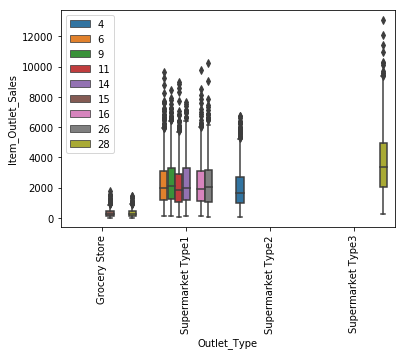

In [49]:
testold = sns.boxplot(data = data, x = 'Outlet_Type', y = 'Item_Outlet_Sales', hue = 'Outlet_Years', order = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
testold.set_xticklabels(testold.get_xticklabels(),rotation=90)
leg = testold.legend()
testold.legend(loc = 'upper left')

**--> Supermarket Type3 is the oldest, while Supermarket Type2 is the newest. Supermarket Type1 having many stores is build at different periods.**

**Changing categories of low fat**

In [50]:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [51]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

# Analysis

**Numerical Data**

In [52]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Item_Visibility_MeanRatio,Outlet_Years
count,14204.000000,8523.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,141.004977,2181.288914,0.069710,12.793380,1997.830681,1.061884,15.169319
std,62.086938,1706.499616,0.049728,4.651716,8.371664,0.235907,8.371664
min,31.290000,33.290000,0.003575,4.555000,1985.000000,0.844563,4.000000
25%,94.012000,834.247400,0.031145,8.710000,1987.000000,0.925131,9.000000
50%,142.247000,1794.331000,0.057194,12.600000,1999.000000,0.999070,14.000000
75%,185.855600,3101.296400,0.096930,16.750000,2004.000000,1.042007,26.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000,3.010094,28.000000


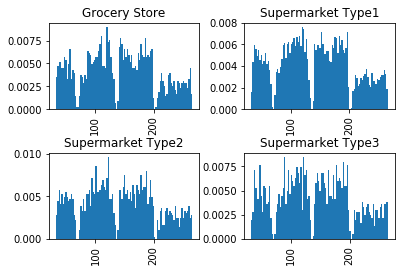

In [53]:
test = data.hist(column = 'Item_MRP' , by = 'Outlet_Type', bins = 100, density = True)

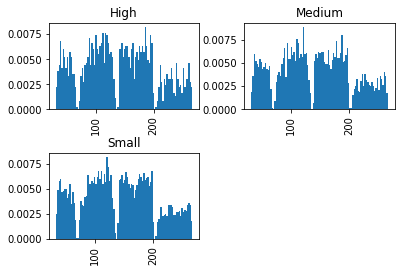

In [54]:
test = data.hist(column = 'Item_MRP', by = 'Outlet_Size', bins = 100, density = True)

Checking the dependence of Item_MRP into Outlet_Type

No handles with labels found to put in legend.
No handles with labels found to put in legend.


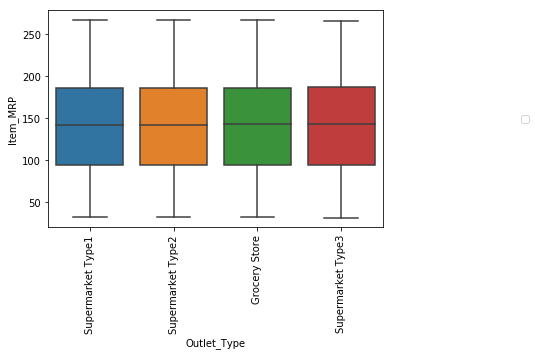

In [55]:
test = sns.boxplot(data = data, x = 'Outlet_Type', y = 'Item_MRP')
test.set_xticklabels(test.get_xticklabels(),rotation=90)
leg = test.legend()
test.legend(loc = 'center right', bbox_to_anchor = (1.45, 0.5))

Item_MRP does not depeding on Outlet_Type

**However, there is a distinguish between Outlet_Type and Outlet_Item_Sales**

No handles with labels found to put in legend.
No handles with labels found to put in legend.


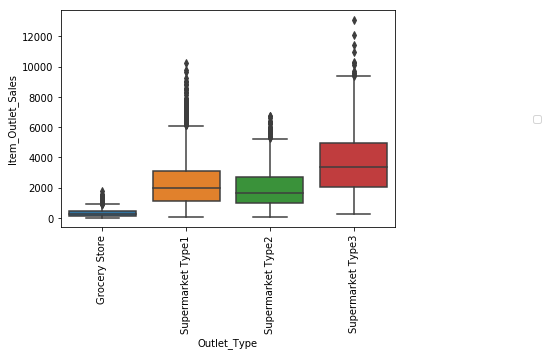

In [56]:
test = sns.boxplot(data = data, x = 'Outlet_Type', y = 'Item_Outlet_Sales', order = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
test.set_xticklabels(test.get_xticklabels(), rotation = 90)
leg = test.legend()
test.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

Although the Item_MRP is the same for Outket_Type, Item_Outlet_Sales of Grocery Store is very low. Let's find the reason.

**Checking Outlet_Type**

[Text(0,0,'Dairy'),
 Text(0,0,'Soft Drinks'),
 Text(0,0,'Meat'),
 Text(0,0,'Fruits and Vegetables'),
 Text(0,0,'Household'),
 Text(0,0,'Baking Goods'),
 Text(0,0,'Snack Foods'),
 Text(0,0,'Frozen Foods'),
 Text(0,0,'Breakfast'),
 Text(0,0,'Health and Hygiene'),
 Text(0,0,'Hard Drinks'),
 Text(0,0,'Canned'),
 Text(0,0,'Breads'),
 Text(0,0,'Starchy Foods'),
 Text(0,0,'Others'),
 Text(0,0,'Seafood')]

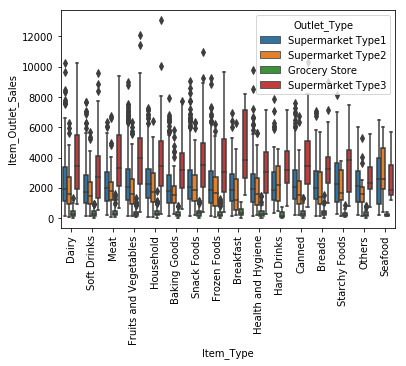

In [57]:
test = sns.boxplot(data = data, x = 'Item_Type', y = 'Item_Outlet_Sales', hue = 'Outlet_Type')
test.set_xticklabels(test.get_xticklabels(), rotation = 90)

Grocery Store sells less items than other Outlet_Type

**Exploring Outlet_Item_Sales and Outlet_Years**

[Text(0,0,'Grocery Store'),
 Text(0,0,'Supermarket Type1'),
 Text(0,0,'Supermarket Type2'),
 Text(0,0,'Supermarket Type3')]

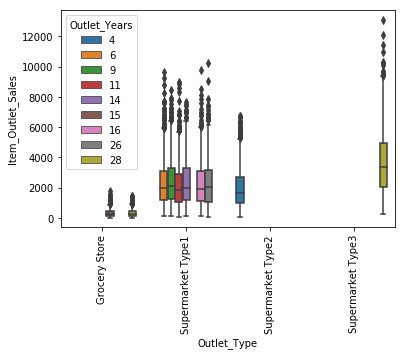

In [58]:
test = sns.boxplot(data = data, x = 'Outlet_Type', y = 'Item_Outlet_Sales', hue = 'Outlet_Years', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
test.set_xticklabels(test.get_xticklabels(), rotation = 90)

Amazingly, although the old of Supermarket Type3 is 28 years old, its sales is very high. Meanwhile, the sales of Grocery Store is the lowest.<br>
**Maybe the reason for the lowest sales of Grocery Store is because these stores least item types. But, about Item_Size?**

[Text(0,0,'Grocery Store'),
 Text(0,0,'Supermarket Type1'),
 Text(0,0,'Supermarket Type2'),
 Text(0,0,'Supermarket Type3')]

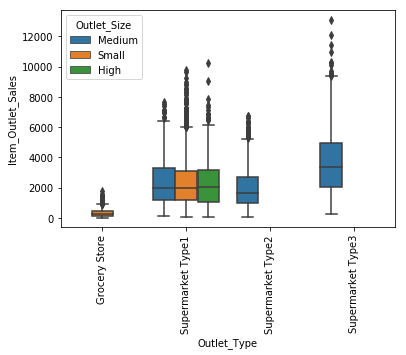

In [59]:
test = sns.boxplot(data = data, x = 'Outlet_Type', y = 'Item_Outlet_Sales', hue = 'Outlet_Size', order = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
test.set_xticklabels(test.get_xticklabels(), rotation = 90)

No, the Item_Size is not affects to Item_Outlet_Sales

# Building model

In [60]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
Item_Visibility_MeanRatio    float64
Item_Type_Combined            object
Outlet_Years                   int64
dtype: object

In [61]:
from sklearn.preprocessing import LabelEncoder
# Encode labels with value between 0 and n_classes-1.
labelEncoder = LabelEncoder()
# New variable for outlet
data['Outlet'] = labelEncoder.fit_transform(data['Outlet_Identifier'])


In [62]:
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']

In [63]:
labelEncoder = LabelEncoder()

In [64]:
for i in var_mod:
    data[i] = labelEncoder.fit_transform(data[i])


In [65]:
from copy import deepcopy
data_copy = deepcopy(data)

In [66]:
#One Hot Coding:
data_copy = pd.get_dummies(data, columns=['Item_Fat_Content',
                                          'Outlet_Location_Type',
                                          'Outlet_Size',
                                          'Outlet_Type',
                                          'Item_Type_Combined',
                                          'Outlet'])

In [67]:
data_copy.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

In [68]:
data_copy[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)


,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


In [69]:
data_copy[['Outlet_Location_Type_0','Outlet_Location_Type_1','Outlet_Location_Type_2']].head(10)

,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,1,0
9,0,1,0


In [70]:
#Drop the columns which have been converted to different types:
data_copy.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [71]:
data_copy.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Visibility              float64
Item_Weight                  float64
Outlet_Identifier             object
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

In [72]:
#Divide into test and train:
train_model = data_copy.loc[data_copy['source']=="train"]
test_model = data_copy.loc[data_copy['source']=="test"]


In [73]:
train_model.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Visibility              float64
Item_Weight                  float64
Outlet_Identifier             object
source                        object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

In [74]:
#Drop unnecessary columns:
test_model.drop(['Item_Outlet_Sales', 'source'], axis = 1, inplace = True)
train_model.drop(['source'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [75]:
#Export files as modified versions:
train_model.to_csv("train_modified.csv", index = False)
test_model.to_csv("test_modified.csv", index = False)

In [76]:
train_model.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Visibility              float64
Item_Weight                  float64
Outlet_Identifier             object
Item_Visibility_MeanRatio    float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
Outlet_1                       uint8
Outlet_2                       uint8
O

In [77]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier', 'Outlet_Identifier']

In [78]:
from sklearn import model_selection, metrics

In [84]:
import matplotlib.pyplot as plt
def modelfit(model, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    model.fit(dtrain[predictors], dtrain[target]) # x: predictors, y: target
    
    #Predict training set:
    dtrain_predictions = model.predict(dtrain[predictors])

   
    
    #Perform cross-validation:
    cv_score = model_selection.cross_val_score(model, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #print(dtrain[predictors])
    
    #print('\n')
    #print(dtrain[target])
    
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = model.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)  
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    #print(submission)
    submission.to_csv(filename, index=False)
    print('Finish')
    
    


Model Report
RMSE : 1058
CV Score : Mean - 1091 | Std - 45.42 | Min - 1003 | Max - 1186
Finish


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


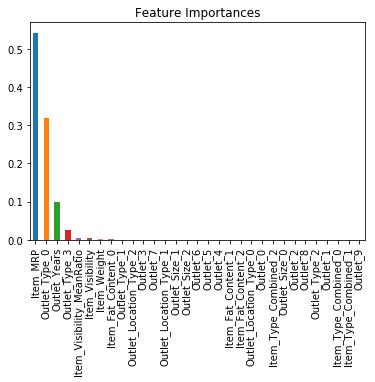

In [88]:
from sklearn.tree import DecisionTreeRegressor

predictors = [x for x in train_model.columns if x not in [target]+IDcol]

# print predictors
model2 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(model2, train_model, test_model, predictors, target, IDcol, 'model2.csv')

coef2 = pd.Series(model2.feature_importances_, predictors).sort_values(ascending=False)
coef2.plot(kind='bar', title='Feature Importances')

